In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

C:\Users\codehax\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
x_data = np.linspace(0.0,10,1000000)
noice=np.random.randn(len(x_data))
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

y=mx+b
b=5

In [4]:
y_true=(0.5 * x_data) + 5 +noice

In [6]:
x_df=pd.DataFrame(data=x_data, columns=['X Data'])
y_df=pd.DataFrame(data=y_true, columns=['Y'])
my_data=pd.concat([x_df,y_df], axis=1)

In [7]:
my_data.head()

,X Data,Y
0,0.00000,4.319808
1,0.00001,4.361813
2,0.00002,6.203802
3,0.00003,4.140728
4,0.00004,6.680072


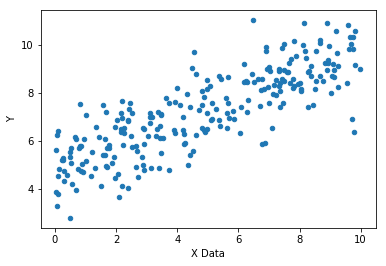

In [9]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [10]:
batch_size=8
m=tf.Variable(0.81)
b=tf.Variable(0.17)

In [11]:
xph=tf.placeholder(tf.float32,[batch_size])
yph=tf.placeholder(tf.float32,[batch_size])

In [12]:
y_model = m*xph + b

In [13]:
error=tf.reduce_sum(tf.square(yph-y_model))

In [14]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.001)
train=optimizer.minimize(error)

In [17]:
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    batches=1000 
    for i in range(batches):
        rand_ind=np.random.randint(len(x_data), size=batch_size)
        feed={xph:x_data[rand_ind], yph:y_true[rand_ind]}
        sess.run(train,feed_dict=feed)
    model_m, model_b=sess.run([m,b])

In [19]:
model_m

0.50050133

In [20]:
model_b

4.8799086

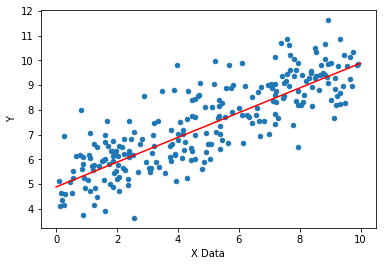

In [22]:
y_hat=x_data*model_m + model_b
my_data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data,y_hat,'r')

In [23]:
###TF Estimator
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\codehax\\AppData\\Local\\Temp\\tmpeq6binqw', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000020FF8F7E860>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [27]:
print(x_train.shape)
print(x_eval.shape)

(700000,)
(300000,)


In [28]:
input_func=tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                              y_train,batch_size=8, 
                                              num_epochs=None,
                                              shuffle=True)

In [29]:
train_input_func=tf.estimator.inputs.numpy_input_fn({'x': x_train},
                                              y_train,batch_size=8, 
                                              num_epochs=1000,
                                              shuffle=False)

In [30]:
eval_input_func=tf.estimator.inputs.numpy_input_fn({'x': x_eval},
                                              y_eval,batch_size=8, 
                                              num_epochs=1000,
                                              shuffle=False)

In [31]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\codehax\AppData\Local\Temp\tmpeq6binqw\model.ckpt.
INFO:tensorflow:loss = 519.2604, step = 1
INFO:tensorflow:global_step/sec: 538.421
INFO:tensorflow:loss = 28.578419, step = 101 (0.216 sec)
INFO:tensorflow:global_step/sec: 551.806
INFO:tensorflow:loss = 13.880936, step = 201 (0.156 sec)
INFO:tensorflow:global_step/sec: 440.63
INFO:tensorflow:loss = 16.813583, step = 301 (0.222 sec)
INFO:tensorflow:global_step/sec: 437.414
INFO:tensorflow:loss = 18.057789

In [32]:
train_metrics=estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-04-09:56:35
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\codehax\AppData\Local\Temp\tmpeq6binqw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-04-09:56:38
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.1049522, global_step = 1000, label/mean = 7.5038104, loss = 8.839618, prediction/mean = 7.4415727
INFO:tensorflow:Saving 'checkpoint_pa

In [33]:
eval_metrics=estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-04-09:59:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\codehax\AppData\Local\Temp\tmpeq6binqw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-04-04-09:59:24
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.072798, global_step = 1000, label/mean = 7.476791, loss = 8.582384, prediction/mean = 7.4198847
INFO:tensorflow:Saving 'checkpoint_path

In [34]:
print('Training Data Metrices')
print(train_metrics)

Training Data Metrices
{'average_loss': 1.1049522, 'label/mean': 7.5038104, 'loss': 8.839618, 'prediction/mean': 7.4415727, 'global_step': 1000}


In [35]:
print('EVAL Metrics')
print(eval_metrics)

EVAL Metrics
{'average_loss': 1.072798, 'label/mean': 7.476791, 'loss': 8.582384, 'prediction/mean': 7.4198847, 'global_step': 1000}


In [37]:
new_data=np.linspace(0,10,10)
input_fn_predict=tf.estimator.inputs.numpy_input_fn({'x':new_data},shuffle=False)
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\codehax\AppData\Local\Temp\tmpeq6binqw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4379745], dtype=float32)},
 {'predictions': array([5.105141], dtype=float32)},
 {'predictions': array([5.7723074], dtype=float32)},
 {'predictions': array([6.439474], dtype=float32)},
 {'predictions': array([7.106641], dtype=float32)},
 {'predictions': array([7.7738075], dtype=float32)},
 {'predictions': array([8.440973], dtype=float32)},
 {'predictions': array([9.108141], dtype=float32)},
 {'predictions': array([9.775307], dtype=float32)},
 {'predictions': array([10.442474], dtype=float32)}]

In [39]:
predictions=[]
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\codehax\AppData\Local\Temp\tmpeq6binqw\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


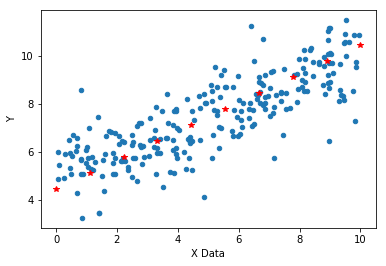

In [41]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(new_data,predictions,'r*')